In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Activation,
    SimpleRNN
)
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

from utils import config_gpu
_ = config_gpu()

/home/youjin2/venvs/py3/lib/python3.6/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
num_labels = len(np.unique(y_train))
print(num_labels)

10


* one-hot encoding

In [4]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

* resize image and normalize to [0, 1]

In [5]:
img_size = x_train.shape[1]

In [6]:
x_train = np.reshape(x_train, [-1, img_size, img_size])
x_test = np.reshape(x_test, [-1, img_size, img_size])

In [7]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

* parameter configurations

In [8]:
input_shape = (img_size, img_size)
batch_size = 128
units = 256
dropout = 0.2

* build model

In [9]:
model = Sequential()

In [10]:
model.add(SimpleRNN(units=units, dropout=dropout, input_shape=input_shape))

In [11]:
model.add(Dense(num_labels))

In [12]:
model.add(Activation('softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 256)               72960     
_________________________________________________________________
dense (Dense)                (None, 10)                2570      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________


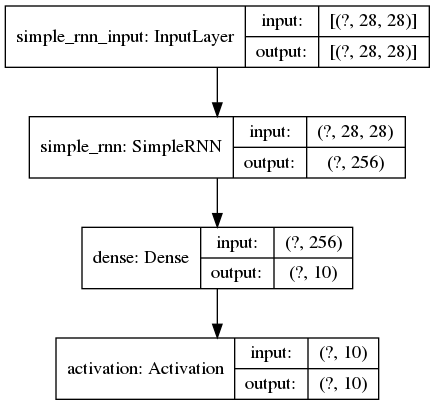

In [14]:
plot_model(model, to_file='../figures/rnn-mnist.png', show_shapes=True)

In [15]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

In [16]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 78us/sample - loss: 0.7966 - accuracy: 0.7653
Epoch 2/20
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3757 - accuracy: 0.8876
Epoch 3/20
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2838 - accuracy: 0.9143
Epoch 4/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2417 - accuracy: 0.9273
Epoch 5/20
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2106 - accuracy: 0.9362
Epoch 6/20
60000/60000 [==============================] - 4s 60us/sample - loss: 0.1918 - accuracy: 0.9431
Epoch 7/20
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1730 - accuracy: 0.9477
Epoch 8/20
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1573 - accuracy: 0.9522
Epoch 9/20
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1509 - accuracy: 0.9545
Epoch 10/20
60

In [17]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [18]:
print('\nTest Accuracy: %.1f%%' % (100.0 * acc))


Test Accuracy: 97.9%
